# Data Analyst Case Study
## CO_2 and Greenhouse Gas Emissions
Die Aufgabe:
 
Exploration und selbstbestimmte Analyse der Daten mit der frei verfügbaren Software KNIME Analytics Platform. 
 
Fokus soll auf der Emissionen Deutschlands über einen selbst gewählten Zeitraum mit eigenständig gewähltem Analyseschwerpunkt liegen. Eine Kombination mit anderen frei verfügbaren Datenquellen (z.B. Wetter- oder Wirtschaftsdaten) kann, muss aber nicht erfolgen. 
 
Bitte bereiten Sie sich darauf vor, Ihre Ergebnisse und Ihre Herangehensweise im gemeinsamen Gespräch vorzustellen und zu diskutieren.
 
Die Case Study soll als Grundlage für ein fachliches Gespräch und einen Einblick in Ihre Herangehens- und Präsentationsweise dienen. Insbesondere die Data Preparation muss hierbei nicht zu viel Aufwand bedeuten.

https://github.com/owid/co2-data

### Vorgehensweise:
- Überblick verschaffen
- Zeitraum beschränken für Vergleichbarkeit mit Energie-Daten
- Sind historeische Ereignisse erkennbar?
    - Widervereinigung, 2008, Ukraine
- Ist der Beitrag Deutschlands zur Klimaärwärmung angemessen mit bezug auf die Bevölkerungsgröße?
- Sind die Klimaziele Deutschlands einhaltbar?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
owid_co2_df = pd.read_csv(r"https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-data.csv")
co2_codebook_df = pd.read_csv(r"https://raw.githubusercontent.com/owid/co2-data/refs/heads/master/owid-co2-codebook.csv")

owid_energy_df = pd.read_csv(r"https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-data.csv")
energy_codebook_df = pd.read_csv(r"https://raw.githubusercontent.com/owid/energy-data/refs/heads/master/owid-energy-codebook.csv")

In [4]:
co2_codebook_df.head()

,column,description,unit,source
0,country,Country - Geographic location.,NaN,Our World in Data - Regions (2023)
1,year,Year - Year of observation.,NaN,Our World in Data - Regions (2023)
2,iso_code,ISO code - ISO 3166-1 alpha-3 three-letter cou...,NaN,International Organization for Standardization...
3,population,"Population - Population by country, available ...",people,Population based on various sources (2024) [ht...
4,gdp,Gross domestic product (GDP) - This data is ad...,international-$ in 2011 prices,Bolt and van Zanden - Maddison Project Databas...


In [5]:
# Filter data from germany

germany_co2_df = owid_co2_df.loc[owid_co2_df.country == "Germany"]

germany_energy_df = owid_energy_df.loc[owid_energy_df.country == "Germany"]

In [6]:
germany_co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
17999,Germany,1792,DEU,NaN,NaN,NaN,NaN,0.469,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18000,Germany,1793,DEU,NaN,NaN,NaN,NaN,0.480,0.011,2.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18001,Germany,1794,DEU,NaN,NaN,NaN,NaN,0.443,-0.037,-7.634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18002,Germany,1795,DEU,NaN,NaN,NaN,NaN,0.447,0.004,0.826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18003,Germany,1796,DEU,NaN,NaN,NaN,NaN,0.535,0.088,19.672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
germany_energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
7835,Germany,1900,DEU,55775391.0,2.587781e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7836,Germany,1901,DEU,56591445.0,2.526593e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7837,Germany,1902,DEU,57433002.0,2.586955e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7838,Germany,1903,DEU,58300637.0,2.731376e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7839,Germany,1904,DEU,59181365.0,2.840587e+11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def create_line_plot(col: str, y_label: str, ds = "co2", x_label = "Year", unit_label=True, descritpion = False):
    """
    Create a line plot and fetch units and title from codebook if desired.
  
    :param col: asdf
    :param y_label: asdf

    :return: None

    """
    data_sources = {"co2": germany_co2_df, "energy": germany_energy_df}
    codebook = {"co2": co2_codebook_df, "energy": energy_codebook_df}
    assert ds in data_sources, "Data Source must be co2 or energy"
    plt.plot(data_sources[ds]["year"], data_sources[ds][col])

    if unit_label:
        try:
            unit = " (" +  codebook[ds].loc[codebook[ds]["column"] == col]["unit"].values[0] + ")"
        except:
            unit = ""
    else:
        unit = ""
    
    if descritpion:
        try:
            descritpion_text = codebook[ds].loc[codebook[ds]["column"] == col]["description"].values[0]
        except:
            descritpion_text = ""
        plt.figtext(0.5, -0.02, descritpion_text, ha="center")

    plt.xlabel(x_label)
    plt.ylabel(f"{y_label} {unit}")



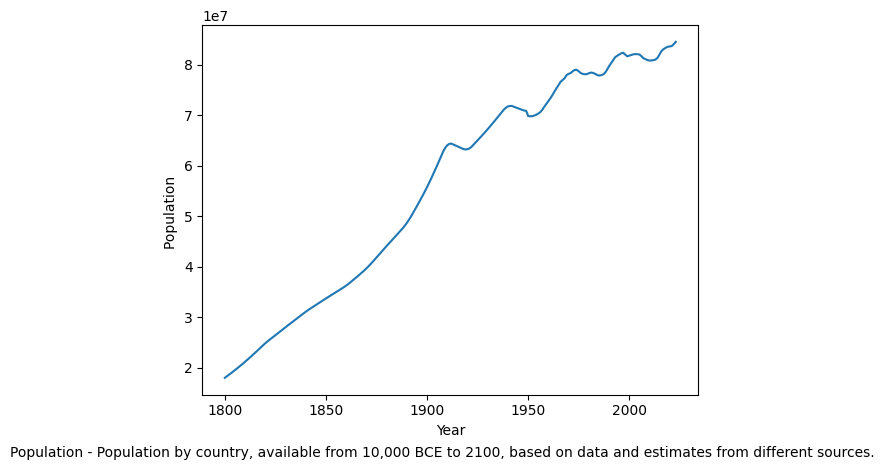

In [9]:
create_line_plot("population", "Population", unit_label=False, descritpion=True)
plt.show()

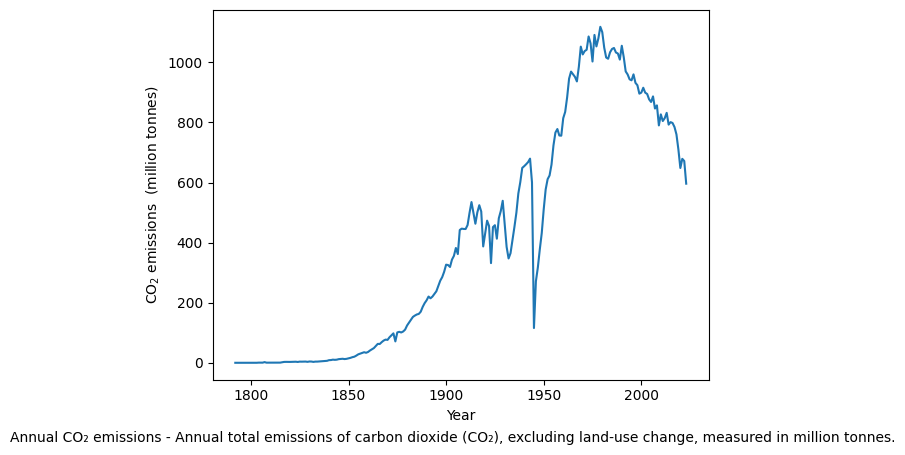

In [10]:
create_line_plot("co2", "CO$_2$ emissions", unit_label=True, descritpion=True)

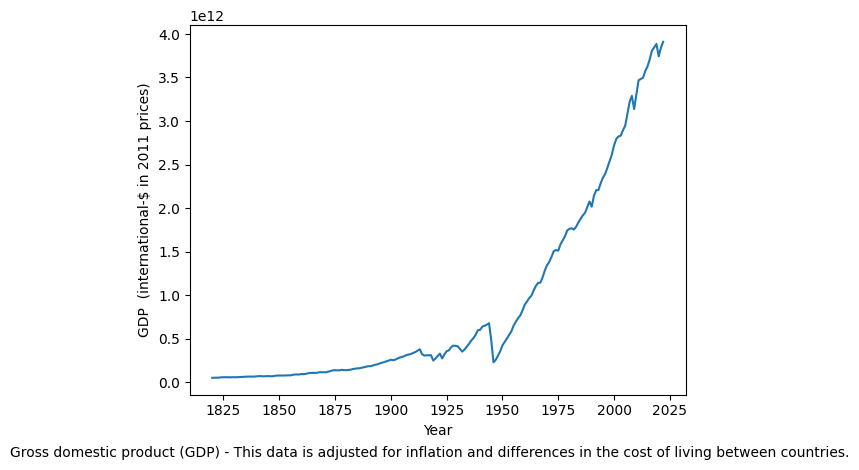

In [11]:
create_line_plot("gdp", "GDP", descritpion=True)

Wann waren die jährlichen CO2-Emissionen am hächsten?

In [12]:
germany_co2_df[germany_co2_df["co2"] == germany_co2_df["co2"].max()]["year"].values[0]

np.int64(1979)

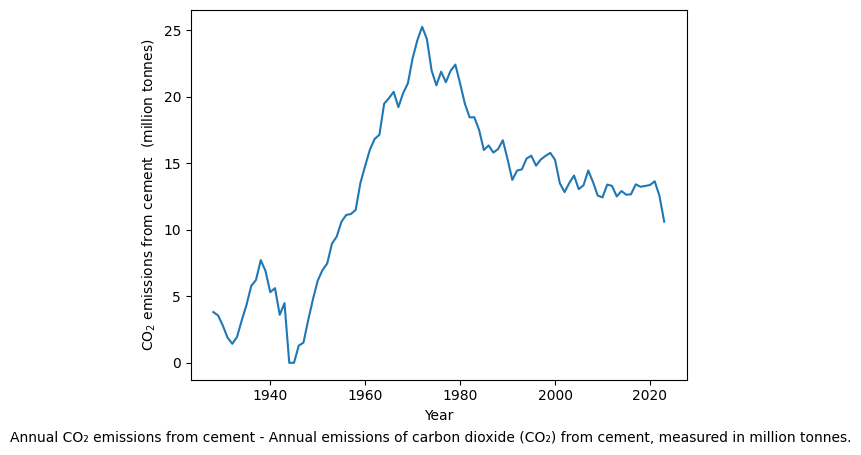

In [13]:
create_line_plot("cement_co2", "CO$_2$ emissions from cement", descritpion=True)

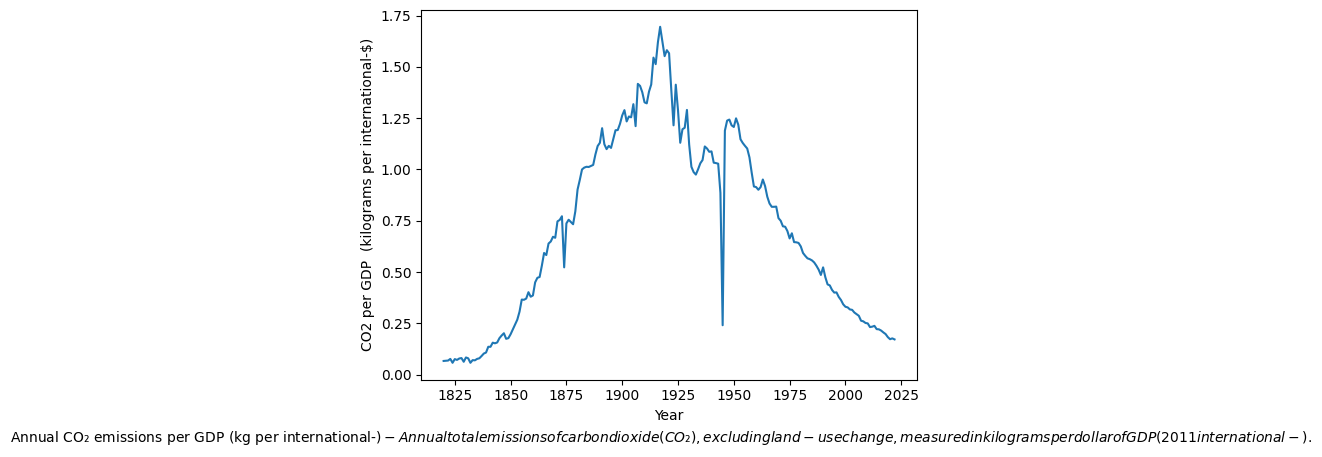

In [14]:
create_line_plot("co2_per_gdp", "CO2 per GDP",descritpion=True)

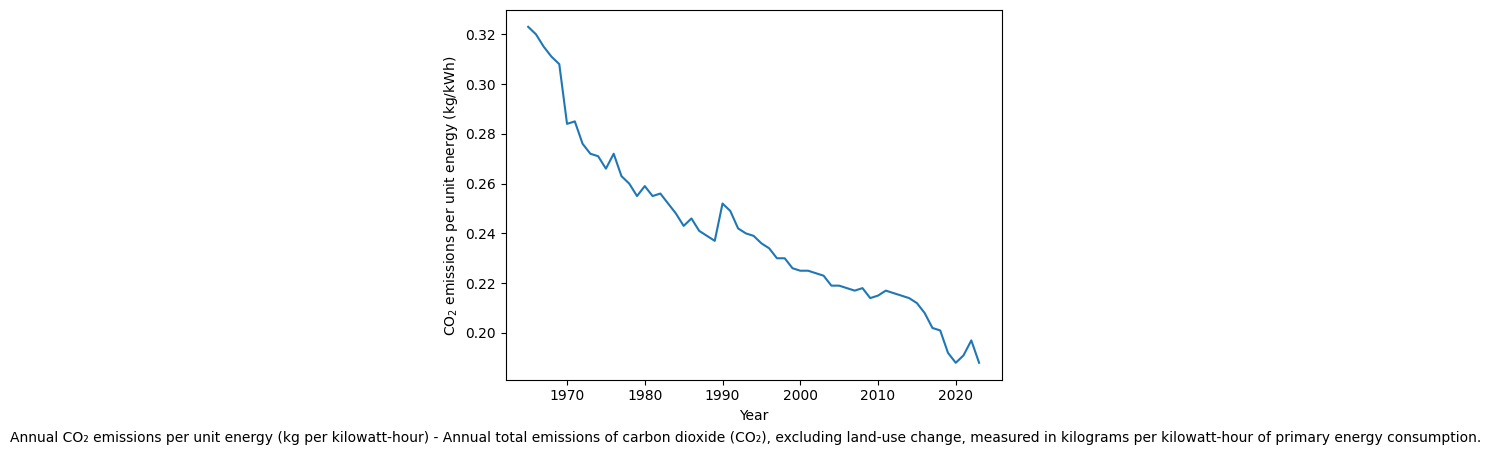

In [15]:
create_line_plot("co2_per_unit_energy", "CO$_2$ emissions per unit energy (kg/kWh)", descritpion=True, unit_label=False)

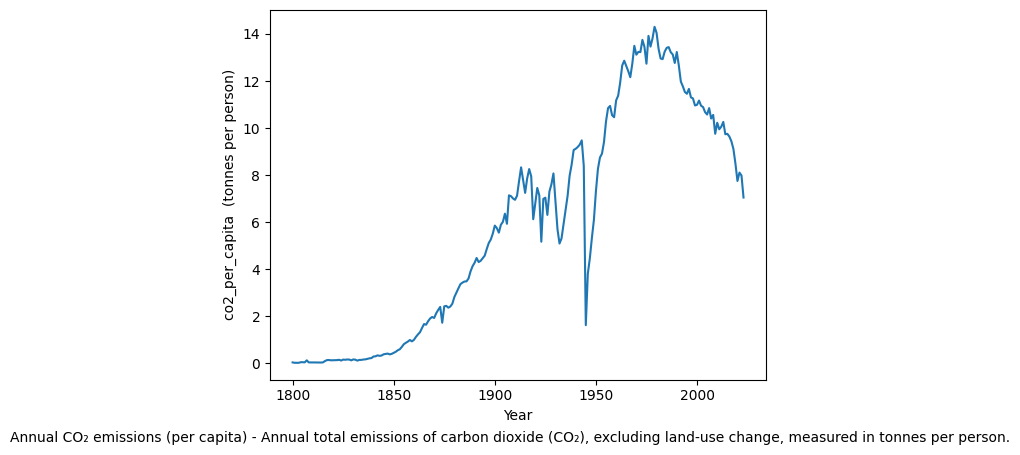

In [16]:
create_line_plot("co2_per_capita", "co2_per_capita", descritpion=True)

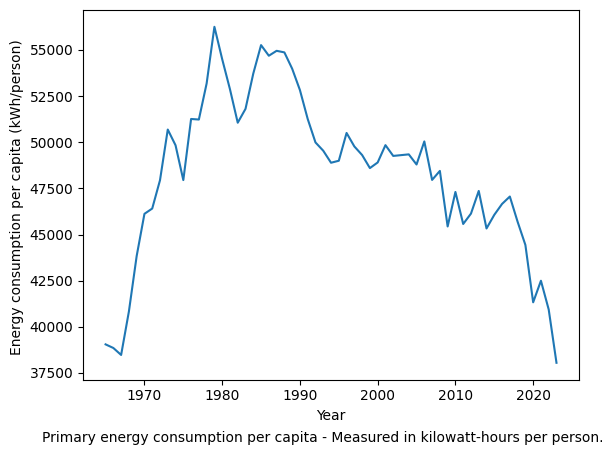

In [17]:
create_line_plot("energy_per_capita", "Energy consumption per capita (kWh/person)", descritpion=True, unit_label=False)

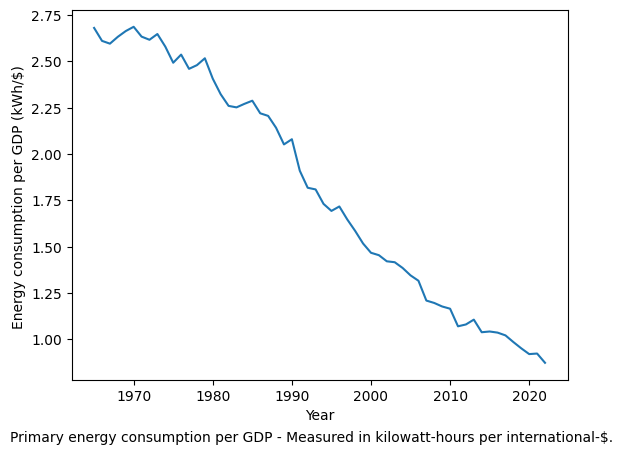

In [18]:
create_line_plot("energy_per_gdp", "Energy consumption per GDP (kWh/$)", descritpion=True, unit_label=False)

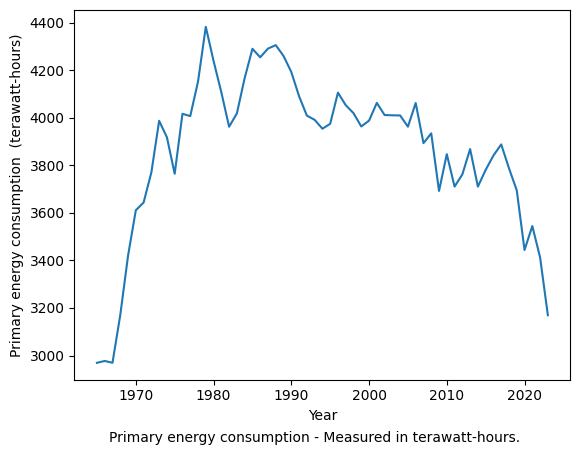

In [19]:
create_line_plot("primary_energy_consumption", "Primary energy consumption", descritpion=True)

In [20]:
temperature_related = [col for col in germany_co2_df.columns if "temp" in col]
for col in temperature_related:
    print(col)

share_of_temperature_change_from_ghg
temperature_change_from_ch4
temperature_change_from_co2
temperature_change_from_ghg
temperature_change_from_n2o


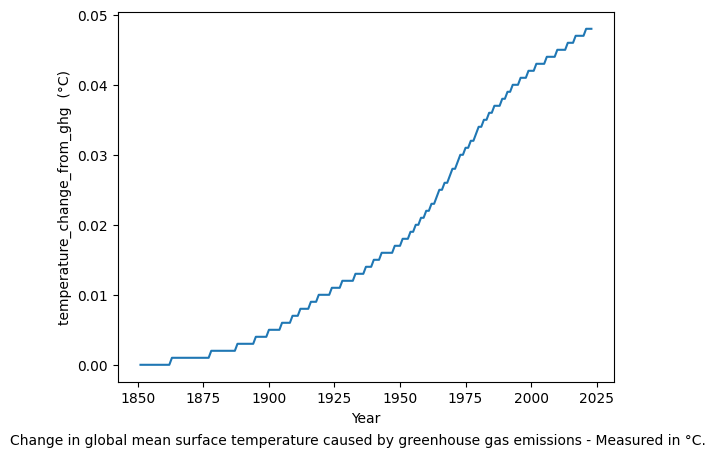

In [21]:
create_line_plot("temperature_change_from_ghg", "temperature_change_from_ghg", descritpion=True)

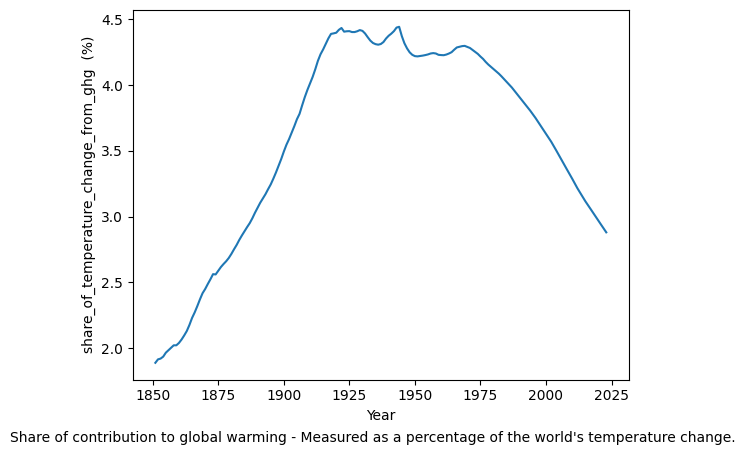

In [22]:
create_line_plot("share_of_temperature_change_from_ghg", "share_of_temperature_change_from_ghg", descritpion=True)

In [23]:
# world population:
world_population = owid_co2_df.loc[owid_co2_df["year"] >= 1965].loc[owid_co2_df["country"] == "World"][["year","population"]]

# German population
german_population = owid_co2_df.loc[owid_co2_df["year"] >= 1965].loc[owid_co2_df["country"] == "Germany"][["year","population"]]

# calculate german share of world population
# SVERWEIS ;)
pop_share_germany = world_population.merge(german_population, on="year", suffixes=["_world", "_germany"])

pop_share_germany["world_pop_share"] = (pop_share_germany.population_germany / pop_share_germany.population_world) * 100


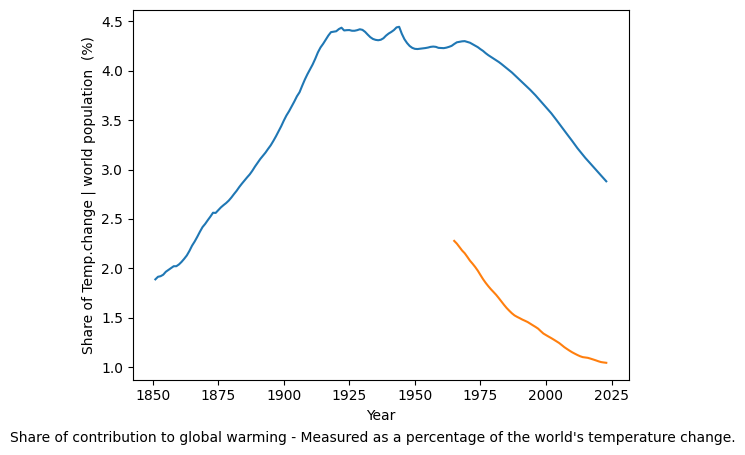

In [24]:
create_line_plot("share_of_temperature_change_from_ghg", "Share of Temp.change | world population", descritpion=True)
plt.plot(pop_share_germany["year"], pop_share_germany["world_pop_share"])
plt.show()


In [25]:
cement_related = [col for col in germany_co2_df.columns if "cement" in col]
for col in cement_related:
    print(col)

cement_co2
cement_co2_per_capita
cumulative_cement_co2
share_global_cement_co2
share_global_cumulative_cement_co2


Text(2012, 18, 'Covid-19?')

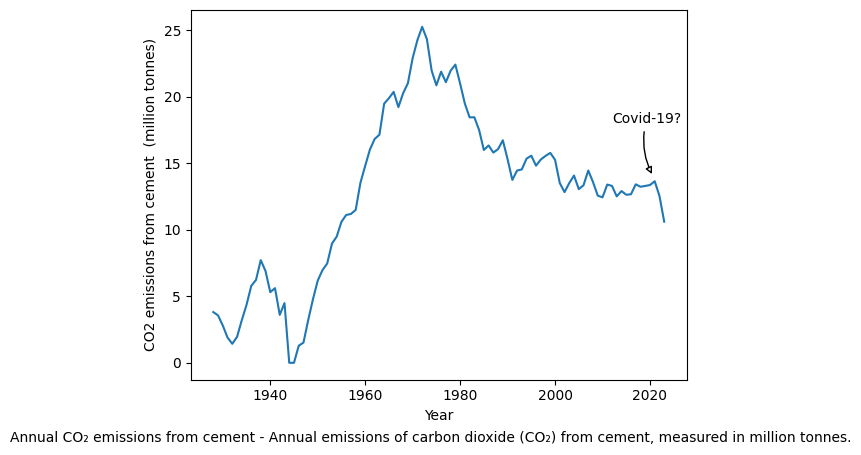

In [26]:
create_line_plot("cement_co2", "CO2 emissions from cement", descritpion=True)
plt.annotate("Covid-19?", xytext=(2012, 18), xy=(2020.7,14) ,arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2",
                                  fc="w"))

In [27]:
energy_consumption_by_source = [col for col in germany_energy_df.columns if "consumption" in col]

energy_consumption_totals = ["fossil_fuel_consumption","primary_energy_consumption", "renewables_consumption"]

energy_consumption_by_source = [source for source in energy_consumption_by_source if source not in energy_consumption_totals]

In [28]:
for col in energy_consumption_by_source:
    print(col)
energy_consumption_by_source.remove("low_carbon_consumption")

biofuel_consumption
coal_consumption
gas_consumption
hydro_consumption
low_carbon_consumption
nuclear_consumption
oil_consumption
other_renewable_consumption
solar_consumption
wind_consumption


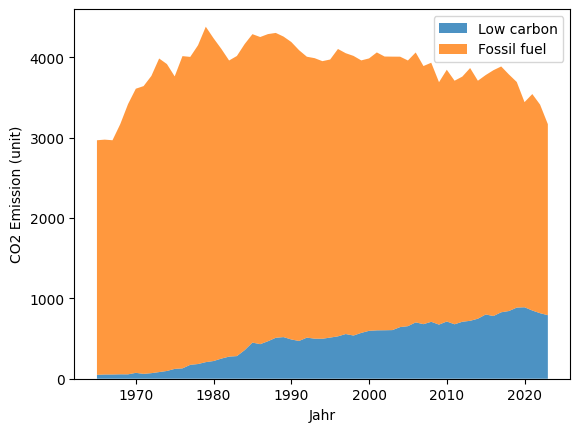

In [29]:
plt.stackplot(germany_energy_df["year"],
              germany_energy_df["low_carbon_consumption"],
              germany_energy_df["fossil_fuel_consumption"],
              labels = ["Low carbon","Fossil fuel"],
              alpha=.8
              )
plt.xlabel("Jahr")
plt.ylabel(f"CO2 Emission (unit)")
plt.legend()
plt.show()

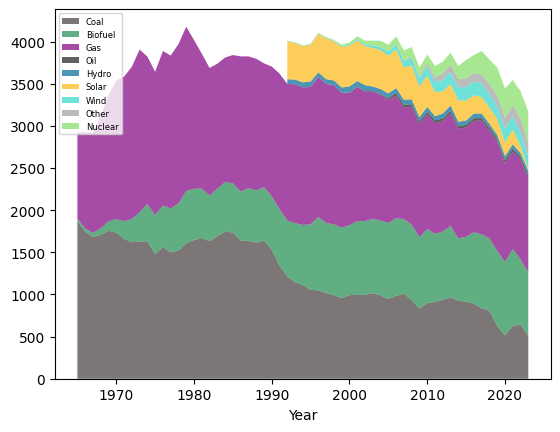

In [30]:
colorsheme = {"Coal": "#463c3c",
              "Biofuel": "#1c8c4c",
              "Gas": "purple",
              "Oil": "#1C1E1B",
              "Hydro": "#006994",
              "Solar": "#FDB813",
              "Wind": "#30D5C8",
              "Other": "#9f9f9f",
              "Nuclear": "#84dd63",
              "low carbon": "red"}

plt.stackplot(germany_energy_df["year"],
              germany_energy_df["coal_consumption"],
              germany_energy_df["gas_consumption"],
              germany_energy_df["oil_consumption"],
              germany_energy_df["biofuel_consumption"],
              
              germany_energy_df["hydro_consumption"],
            # germany_energy_df["low_carbon_consumption"],
              germany_energy_df["nuclear_consumption"],
              
              germany_energy_df["other_renewable_consumption"],
              germany_energy_df["solar_consumption"],
              germany_energy_df["wind_consumption"],
              colors=colorsheme.values(),
              labels=colorsheme.keys(),
              alpha=.7)
plt.legend(loc=2, prop={'size': 6})
plt.xlabel("Year")
plt.show()

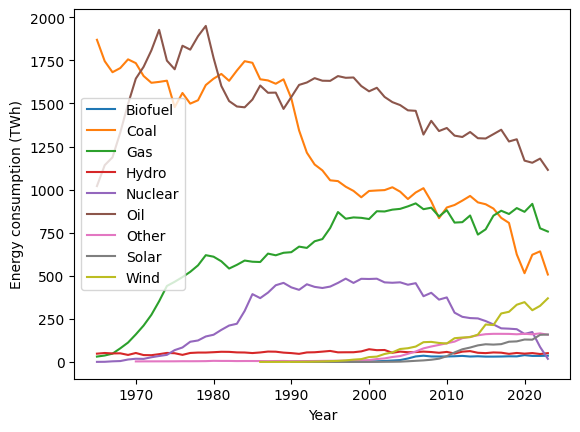

In [32]:
for entry in energy_consumption_by_source:
    plt.plot(germany_energy_df["year"], germany_energy_df[entry], label=entry.split("_")[0].capitalize())
plt.xlabel("Year")
plt.ylabel("Energy consumption (TWh)")
plt.legend()
plt.show()


### Treibhausgasminderungsziele Deutschlands

Die deutschen Treibhausgasminderungsziele sind im Bundes-Klimaschutzgesetzes (Stand August 2024) festgelegt. Die Emissionen sollen bis 2030 um mind. 65 % und bis 2040 um mind. 88 % gesenkt werden (gegenüber 1990). Bis zum Jahr 2045 hat Deutschland das Ziel Netto-Treibhausgasneutralität zu erreichen. Nach dem Jahr 2050 sollen negative Treibhausgasemissionen erreicht werden.

(Umweltbundesamt)


In [33]:
# prepare data for linear regression

emission_ger_1990 = germany_co2_df.loc[germany_co2_df["year"] == 1990]["co2"].values[0]
goal_ger_2030 = emission_ger_1990 * (1 - .65)
goal_ger_2040 = emission_ger_1990 * (1- .88)
goal_ger_2045 = 0

co2_goals = []
co2_goals.extend((goal_ger_2030, goal_ger_2040, goal_ger_2045))
co2_goals_year = [2030, 2040, 2045]

fit_df = germany_co2_df.loc[germany_co2_df["year"] >= 2013][["year", "co2"]]
fit_recent_df = germany_co2_df.loc[germany_co2_df["year"] >= 2017][["year", "co2"]]

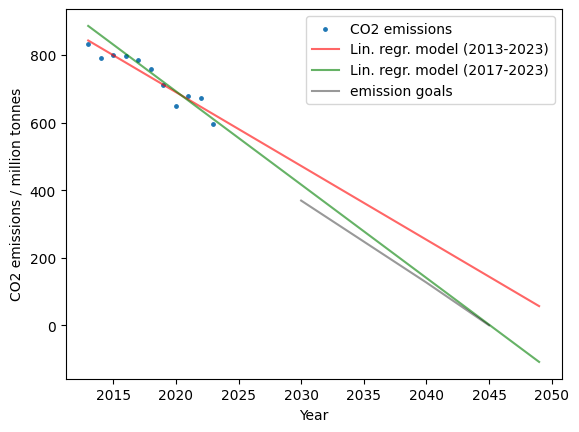

In [34]:
lin_regr_model = LinearRegression()
lin_regr_model_recent = LinearRegression()

xs = fit_df["year"].values
ys = fit_df["co2"].values

xs_recent = fit_recent_df["year"].values
ys_recent = fit_recent_df["co2"].values

xs = xs.reshape(len(xs),1)
ys =  ys.reshape(len(ys),1)

xs_recent = xs_recent.reshape(len(xs_recent),1)
ys_recent = ys_recent.reshape(len(ys_recent),1)

lin_regr_model.fit(xs,ys)

lin_regr_model_recent.fit(xs_recent, ys_recent)


pred_xs = np.arange(start=2013, stop=2050)
pred_xs = pred_xs.reshape(len(pred_xs), 1)

plt.scatter(fit_df["year"], fit_df["co2"], s=6, label="CO2 emissions")
plt.plot(pred_xs, lin_regr_model.predict(pred_xs), color='red', alpha =.6, label="Lin. regr. model (2013-2023)")
plt.plot(pred_xs, lin_regr_model_recent.predict(pred_xs), color='green', alpha =.6, label="Lin. regr. model (2017-2023)")
plt.plot(co2_goals_year, co2_goals, color="black", alpha=.4, label="emission goals")
plt.ylabel("CO2 emissions / million tonnes")
plt.xlabel("Year")
plt.legend()
plt.show()